# Exploring Trees Dataset — Statistical Measures & Visualizations in R

This notebook solves the problems defined in the following document:  
[**Statistics and Visualization Problems using R (PDF)**](https://github.com/amr-yasser226/statistical-inference/blob/main/R/resources/Statistics%20and%20Visualization%20Problems%20using%20R.pdf)

---

**Dataset Used:** Built-in `trees` dataset in R

### Problem 1: Calculating the Statistical Measures in R

We will use the built-in `trees` dataset and create a function that calculates  
the mean, variance, standard deviation, median, and mode of each column.

In [5]:
data(trees)
head(trees)

calculate_measures <- function(x) {
  mean_val <- mean(x)
  var_val <- var(x)
  sd_val <- sd(x)
  median_val <- median(x)
  uniq_vals <- unique(x)
  mode_val <- uniq_vals[which.max(tabulate(match(x, uniq_vals)))]
  list(mean = mean_val, variance = var_val, sd = sd_val, median = median_val, mode = mode_val)
}

results <- lapply(trees, calculate_measures)
results

,Girth,Height,Volume
,<dbl>,<dbl>,<dbl>
1,8.3,70,10.3
2,8.6,65,10.3
3,8.8,63,10.2
4,10.5,72,16.4
5,10.7,81,18.8
6,10.8,83,19.7


$Girth
$Girth$mean
[1] 13.24839

$Girth$variance
[1] 9.847914

$Girth$sd
[1] 3.138139

$Girth$median
[1] 12.9

$Girth$mode
[1] 11


$Height
$Height$mean
[1] 76

$Height$variance
[1] 40.6

$Height$sd
[1] 6.371813

$Height$median
[1] 76

$Height$mode
[1] 80


$Volume
$Volume$mean
[1] 30.17097

$Volume$variance
[1] 270.2028

$Volume$sd
[1] 16.43785

$Volume$median
[1] 24.2

$Volume$mode
[1] 10.3

### Problem 2: Visualizing Data Distributions

We will visualize the distribution of each column in the `trees` dataset using  
histograms and boxplots to understand their spread and shape.

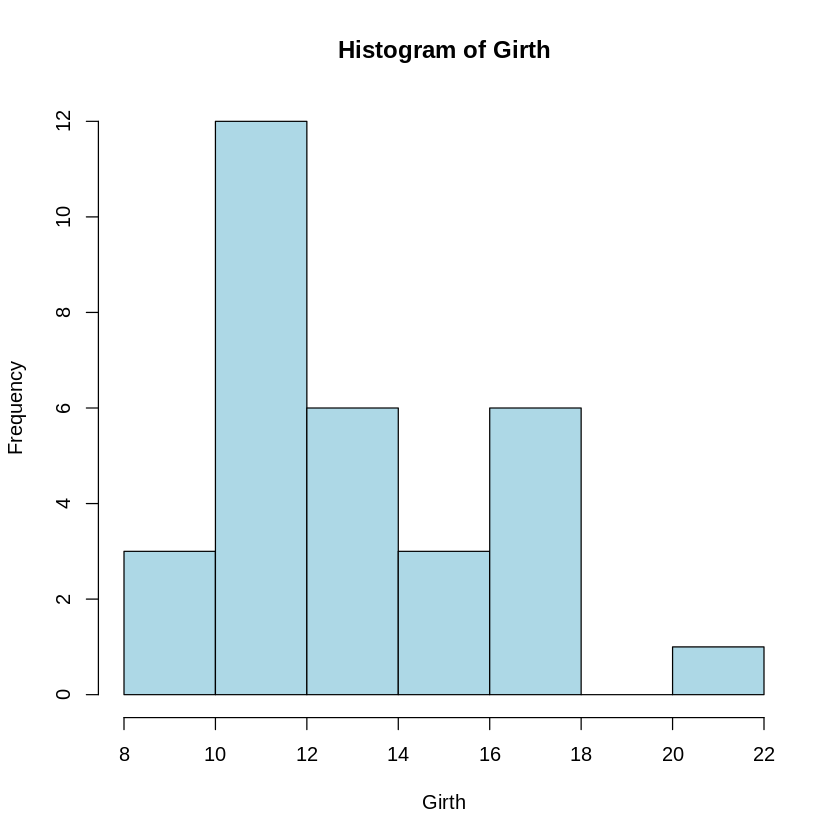

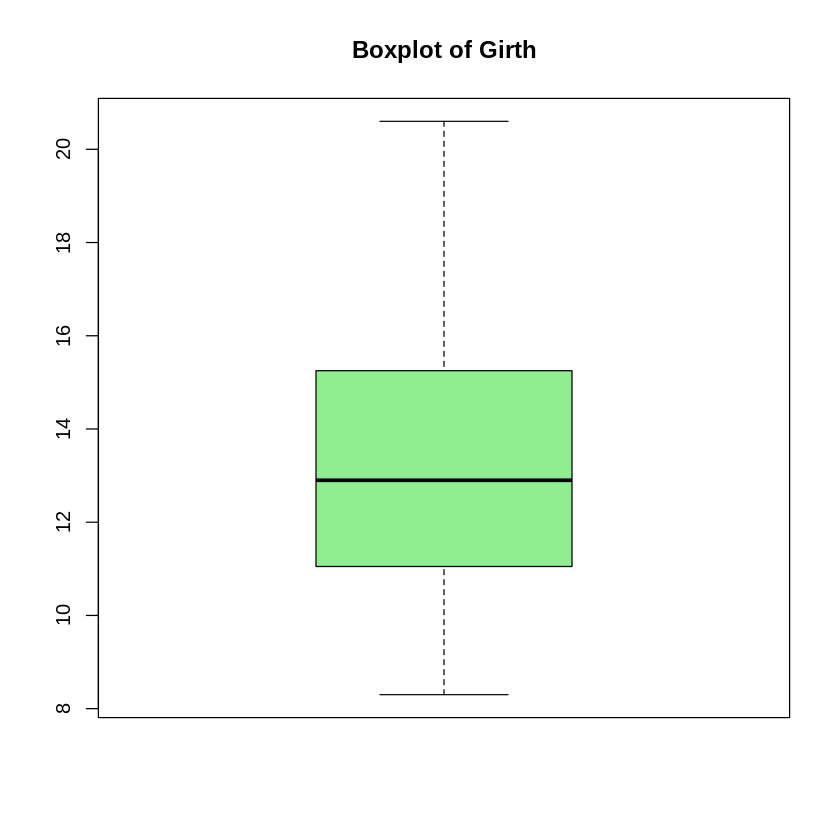

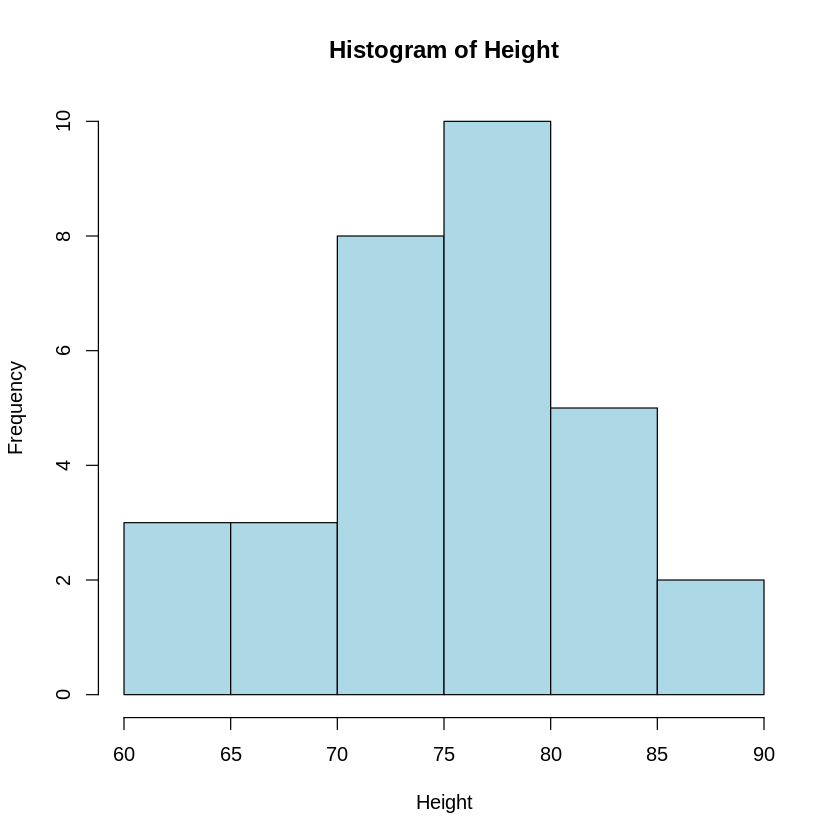

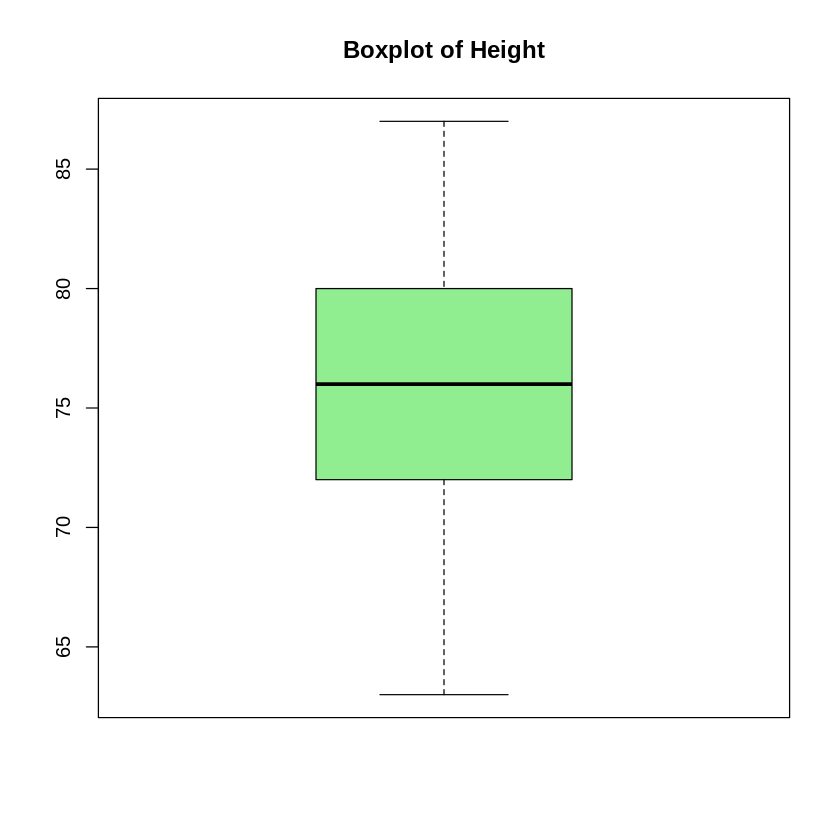

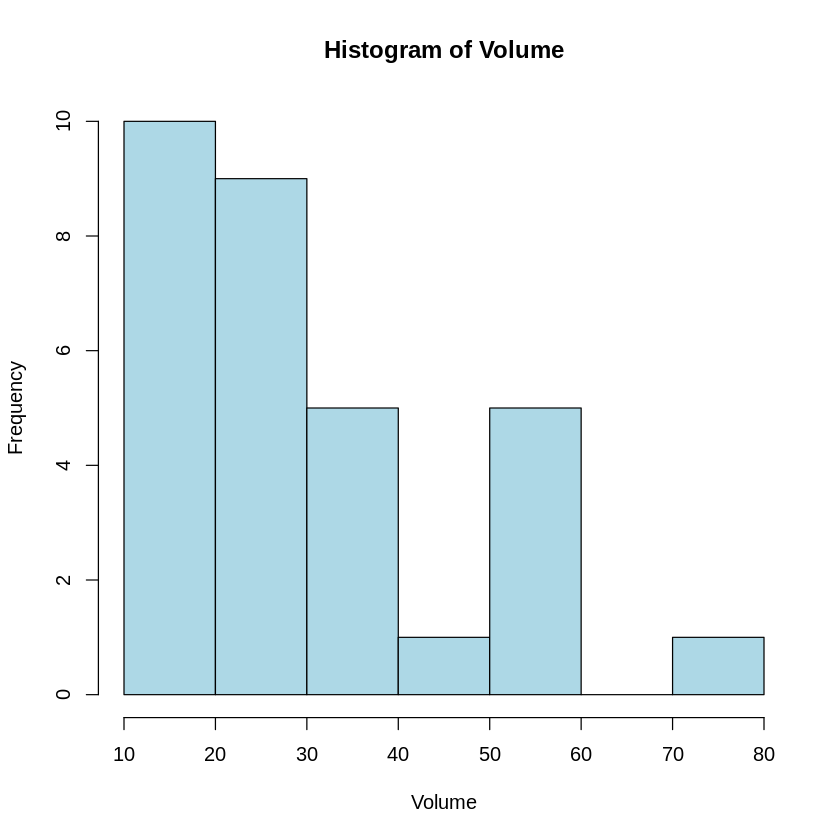

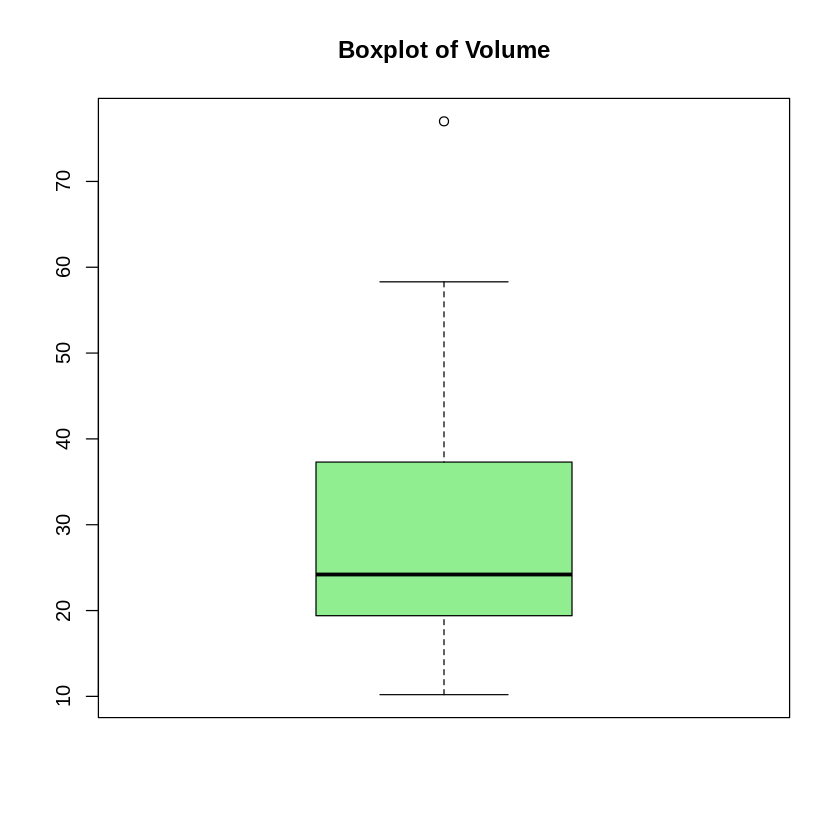

In [2]:
data(trees)

hist(trees$Girth, main = "Histogram of Girth", xlab = "Girth", col = "lightblue", border = "black")
boxplot(trees$Girth, main = "Boxplot of Girth", col = "lightgreen")

hist(trees$Height, main = "Histogram of Height", xlab = "Height", col = "lightblue", border = "black")
boxplot(trees$Height, main = "Boxplot of Height", col = "lightgreen")

hist(trees$Volume, main = "Histogram of Volume", xlab = "Volume", col = "lightblue", border = "black")
boxplot(trees$Volume, main = "Boxplot of Volume", col = "lightgreen")

### Problem 3 — Enhanced Visualizations (Height vs Volume)

This cell produces several improved plots showing the relationship between **Height** and **Volume** from the `trees` dataset:

1. Interactive scatter plot with point size = Girth, color gradient, and a smooth trend line (hover shows values).  
2. Scatter with confidence ribbon and linear regression equation / R² annotation.  
3. Contour + scatter to show density and clusters.  
4. Marginal histograms and boxplots combined into a single layout.

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


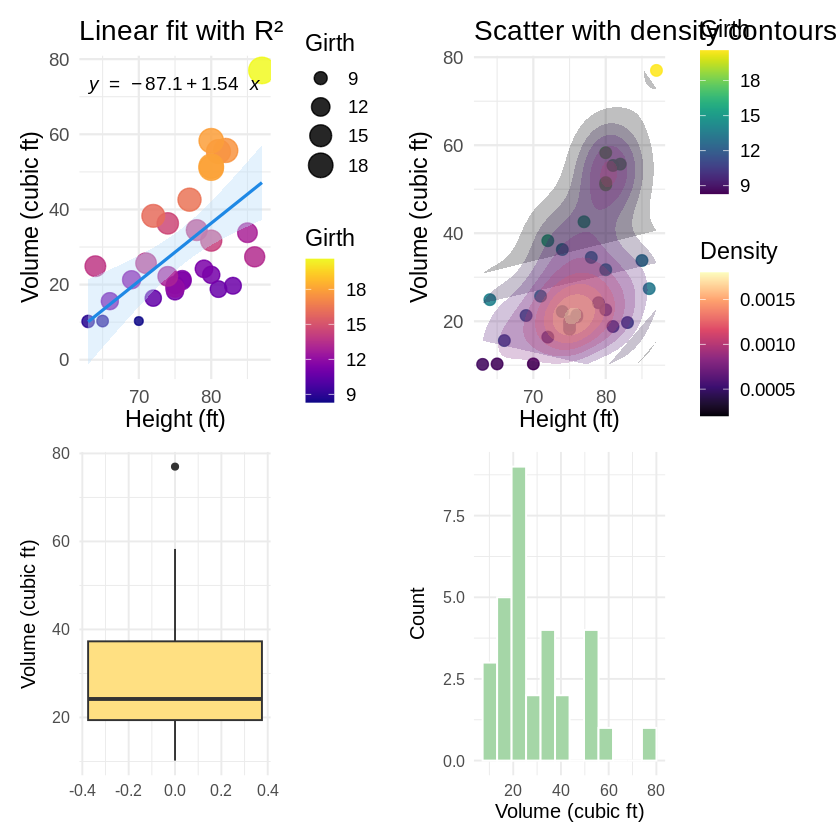

In [9]:
if (!requireNamespace("ggplot2", quietly = TRUE)) install.packages("ggplot2")
if (!requireNamespace("viridis", quietly = TRUE)) install.packages("viridis")
if (!requireNamespace("plotly", quietly = TRUE)) install.packages("plotly")
if (!requireNamespace("patchwork", quietly = TRUE)) install.packages("patchwork")
if (!requireNamespace("ggpmisc", quietly = TRUE)) install.packages("ggpmisc")

library(ggplot2)
library(viridis)
library(plotly)
library(patchwork)
library(ggpmisc)

data(trees)

p_scatter <- ggplot(trees, aes(x = Height, y = Volume, text = paste0("Girth: ", Girth, "<br>Height: ", Height, "<br>Volume: ", Volume))) +
  geom_point(aes(size = Girth, color = Girth), alpha = 0.85) +
  scale_size_continuous(range = c(2,8)) +
  scale_color_viridis(option = "D", name = "Girth") +
  geom_smooth(method = "loess", se = TRUE, color = "#FF6B6B", fill = "#FFCDD2", size = 0.9) +
  labs(title = "Height vs Volume — Interactive scatter", x = "Height (ft)", y = "Volume (cubic ft)") +
  theme_minimal(base_size = 14) +
  theme(legend.position = "right")

lm_mod <- lm(Volume ~ Height, data = trees)
lm_eq <- stat_poly_eq(aes(label = paste(..eq.label.., ..rr.label.., sep = "~~~")),
                      formula = y ~ x, parse = TRUE, size = 4)

p_reg <- ggplot(trees, aes(x = Height, y = Volume)) +
  geom_point(aes(color = Girth, size = Girth), alpha = 0.85) +
  geom_smooth(method = "lm", se = TRUE, color = "#1E88E5", fill = "#BBDEFB", size = 0.9) +
  scale_color_viridis(option = "C", name = "Girth") +
  scale_size_continuous(range = c(2,7)) +
  lm_eq +
  labs(title = "Linear fit with R²", x = "Height (ft)", y = "Volume (cubic ft)") +
  theme_minimal(base_size = 14) +
  theme(legend.position = "right")

p_contour <- ggplot(trees, aes(x = Height, y = Volume)) +
  geom_point(aes(color = Girth), size = 2.8, alpha = 0.9) +
  stat_density_2d(aes(fill = ..level..), geom = "polygon", alpha = 0.25, color = NA) +
  scale_fill_viridis_c(option = "A", name = "Density") +
  scale_color_viridis(option = "D", name = "Girth") +
  labs(title = "Scatter with density contours", x = "Height (ft)", y = "Volume (cubic ft)") +
  theme_minimal(base_size = 14) +
  theme(legend.position = "right")

p_hist_x <- ggplot(trees, aes(x = Height)) + geom_histogram(bins = 12, fill = "#90CAF9", color = "white") +
  labs(x = NULL, y = "Count") + theme_minimal(base_size = 12)

p_hist_y <- ggplot(trees, aes(x = Volume)) + geom_histogram(bins = 12, fill = "#A5D6A7", color = "white") +
  labs(x = "Volume (cubic ft)", y = "Count") + theme_minimal(base_size = 12)

p_box_x <- ggplot(trees, aes(y = Height)) + geom_boxplot(fill = "#E1BEE7") + coord_flip() +
  labs(y = "Height (ft)") + theme_minimal(base_size = 12)

p_box_y <- ggplot(trees, aes(y = Volume)) + geom_boxplot(fill = "#FFE082") +
  labs(y = "Volume (cubic ft)") + theme_minimal(base_size = 12)

layout_top <- p_scatter
layout_bottom <- (p_reg | p_contour) / (p_box_y | p_hist_y)

interactive <- ggplotly(layout_top, tooltip = "text") %>%
  layout(title = list(text = paste0('<b>Height vs Volume — Interactive</b><br>',
                                    '<sup>Point size & color = Girth</sup>')))

print(interactive)
print(patchwork::wrap_plots(p_reg, p_contour, p_box_y, p_hist_y, ncol = 2))